In [1]:
pwd

'/home/xoxai/vehicle_dataset_public'

In [5]:
ls -la | grep -i 'vehicle1'

-rw-r--r--  1 xoxai users  115178 окт  5 12:28 vehicle19_fuelLevel_public.csv
-rw-r--r--  1 xoxai users  137894 окт  5 12:28 vehicle19_ingection_public.csv
-rw-r--r--  1 xoxai users    1315 окт  5 12:29 vehicle19_refueling2_public.csv
-rw-r--r--  1 xoxai users  164495 окт  5 12:29 vehicle19_speedAndHeight_public.csv
-rw-r--r--  1 xoxai users  163542 окт  5 12:29 vehicle19_tachometer_public.csv
-rw-r--r--  1 xoxai users  527136 окт  5 12:20 vehicle1_fuelLevel_public.csv
-rw-r--r--  1 xoxai users 2148219 окт  5 12:20 vehicle1_ingection_public.csv
-rw-r--r--  1 xoxai users    5895 окт  5 12:21 vehicle1_refueling2_public.csv
-rw-r--r--  1 xoxai users 2639781 окт  5 12:21 vehicle1_speedAndHeight_public.csv
-rw-r--r--  1 xoxai users 2390163 окт  5 12:22 vehicle1_tachometer_public.csv


In [3]:
import pandas as pd
# 1 vehicle: 
# -- fuelLevel (T), ingection (T), refueling2 (T), speedAndHeight (T), tachometer (T)

In [11]:
# данные по зажиганию (бинарный признак)
pd.read_csv('./vehicle1_fuelLevel_public.csv', sep=';')

,DTIME,BEVALUE
0,2020-01-08 21:16:02,0
1,2020-01-08 21:17:04,0
2,2020-01-08 21:18:04,0
3,2020-01-09 10:05:26,"49,7"
4,2020-01-09 10:06:27,"49,9"
...,...,...
19027,2020-06-27 00:48:05,54
19028,2020-06-27 00:49:05,"54,2"
19029,2020-06-27 01:15:14,54
19030,2020-06-27 01:16:14,"54,2"


In [8]:
# данные по зажиганию (бинарный признак)
pd.read_csv('./vehicle1_refueling2_public.csv', sep=';')

,TSID,STARTDATE,ENDDATE,STARTLEVEL,ENDLEVEL
0,1,2020-01-16 11:02:40,2020-01-16 13:20:40,"46,7","38,4"
1,1,2020-01-16 13:20:40,2020-01-16 13:25:46,"38,4","56,7"
2,1,2020-01-17 09:05:49,2020-01-17 12:14:10,"56,3",51
3,1,2020-01-17 14:45:48,2020-01-17 16:12:27,51,"43,9"
4,1,2020-01-20 09:44:03,2020-01-20 12:44:07,"43,9","23,5"
...,...,...,...,...,...
98,1,2020-06-26 17:13:03,2020-06-26 18:57:03,"49,3","39,2"
99,1,2020-06-26 18:57:03,2020-06-26 19:04:00,"39,2","59,7"
100,1,2020-06-26 19:04:00,2020-06-26 21:20:41,"59,7","32,2"
101,1,2020-06-26 22:00:39,2020-06-27 00:11:16,"32,2","7,3"


In [9]:
cat readme.txt



























В названиях файлов TSID означает идентификатор ТС.

In [10]:
# Скорость, ключ зажигания (бинарный признак), высота над уровнем моря и скорость передвижения
# , скорость вращения двигателя (об/мин), 

In [47]:
import os
import pandas as pd

In [10]:
# get all files with vehicle word in name
filenames = [filename for filename in os.listdir() if filename.find('vehicle') != -1]

In [42]:
def get_unique_vehicles_sensors(filenames):
    vehicles, sensors = set(), set()
    for filename in filenames:
        vehicle_name, sensor_type, _ = filename.split('_')
        vehicles.add(vehicle_name)
        sensors.add(sensor_type)
    return list(vehicles), list(sensors)

In [43]:
vehicles, sensors = get_unique_vehicles_sensors(filenames)

In [44]:
vehicles

['vehicle28', 'vehicle5', 'vehicle19', 'vehicle1', 'vehicle3']

In [45]:
sensors

['ingection', 'refueling2', 'fuelLevel', 'tachometer', 'speedAndHeight']

In [176]:
vehicles_data = pd.Series()
for vehicle_name in vehicles:
    vehicle = pd.Series()
    for sensor in sensors:
        sensor_df = pd.read_csv('_'.join([vehicle_name, sensor, 'public.csv']), sep=';')
        vehicle[sensor] = sensor_df
    vehicles_data[vehicle_name] = vehicle

In [177]:
vehicles, sensors

(['vehicle28', 'vehicle5', 'vehicle19', 'vehicle1', 'vehicle3'],
 ['ingection', 'refueling2', 'fuelLevel', 'tachometer', 'speedAndHeight'])

In [178]:
for vehicle in vehicles:
    vehicles_data[vehicle].fuelLevel.BEVALUE = vehicles_data[vehicle].fuelLevel.BEVALUE.str.replace(',', '.').astype('float')

In [179]:
for vehicle in vehicles:
    vehicles_data[vehicle]['max_fuel'] = vehicles_data[vehicle].fuelLevel.BEVALUE.max()

In [180]:
for vehicle in vehicles:
    print(vehicles_data[vehicle].max_fuel)

60.0
73.5
95.0
60.0
279.8


Анализ максимального уровня топлива в баках за весь предоставленный период времени может свидетельствовать о том, что vehicle28 и vehicle1 с максимальным объемом в 60 литров с больой вероятностью являются легковыми автомобилями.

Таким же является vehicle5 с максимальным объемом в 73,5 литра.

Транспортное средство с идентификатором vehicle19 относится к типу (???)

vehicle3 -- фура с самым большим из представленных баков, предназначена для транспортировки грузов на дальние расстояния, магистральный тягач типа MAN, 279.8 (280) литров.

In [192]:
for vehicle in vehicles:
    # vehicles_data[vehicle].speedAndHeight.DTIME = vehicles_data[vehicle].speedAndHeight.DTIME.astype('datetime64')
    vehicles_data[vehicle].speedAndHeight.SPEED = vehicles_data[vehicle].speedAndHeight.SPEED.str.replace(',', '.').astype('float')
    # vehicles_data[vehicle].speedAndHeight.HEIGHT = vehicles_data[vehicle].speedAndHeight.HEIGHT.str.replace(',', '.').astype('float')

AttributeError: Can only use .str accessor with string values!

In [217]:
for vehicle in vehicles:
    df = vehicles_data[vehicle].speedAndHeight
    vehicles_data[vehicle]['max_height'] = df.HEIGHT.max()
    vehicles_data[vehicle]['min_height'] = df.HEIGHT.min()
    vehicles_data[vehicle]['avg_height'] = df.HEIGHT.mean()
    vehicles_data[vehicle]['height_range'] = df.HEIGHT.max() - df.HEIGHT.min()

In [210]:
def show_params(param_name, params):
    for vehicle in vehicles:
        for param in params:
            print(vehicle, ' '.join(params))

In [212]:
show_param(['min_height', 'max_height', 'avg_height'])

vehicle28 min_height    -2561.8
max_height      375.3
avg_height    61.5954
dtype: object
vehicle5 min_height   -3228.2
max_height    3258.7
avg_height    52.983
dtype: object
vehicle19 min_height      -46.6
max_height     2812.8
avg_height    81.3893
dtype: object
vehicle1 min_height    -1503.6
max_height     2193.4
avg_height    37.0444
dtype: object
vehicle3 min_height      -79.7
max_height      167.1
avg_height    56.7928
dtype: object


In [213]:
for vehicle in vehicles:
    df = vehicles_data[vehicle].speedAndHeight
    vehicles_data[vehicle]['max_speed'] = df.SPEED.max()
    vehicles_data[vehicle]['min_speed'] = df.SPEED.min()
    vehicles_data[vehicle]['avg_speed'] = df.SPEED.mean()
    vehicles_data[vehicle]['speed_range'] = df.SPEED.max() - df.SPEED.min()

In [219]:
vehicles_df = pd.DataFrame()
for vehicle in vehicles:
    vehicles_df[vehicle] = vehicles_data[vehicle][['max_fuel', 'max_height', 'min_height', 'avg_height', 'height_range', 'max_speed', 'min_speed', 'avg_speed', 'speed_range']]

In [229]:
vdft = vehicles_df.drop('min_speed').transpose()

In [237]:
from matplotlib import pyplot as plt 

In [241]:
dp = list(vdft[['max_fuel', 'max_speed']].values)

In [243]:
X = [el[0] for el in dp]
y = [el[1] for el in dp]

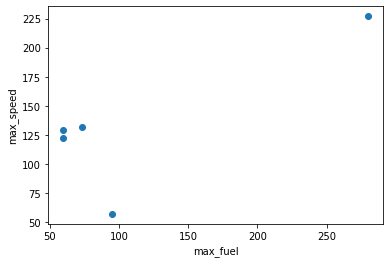

<Figure size 864x864 with 0 Axes>

In [252]:
plt.scatter(X, y)
plt.xlabel('max_fuel')
plt.ylabel('max_speed')
plt.figure(figsize=(12,12))
plt.show()